|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) | [WIRED Global Center](https://resilience.utah.edu/) | [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html)  |
|:---:|:---:|:---:|
|![nsdf](NSDF-smaller.PNG) | ![NASA](NASA.png) | ![wired](wired-logo-small.png) |

### Access to the CMPI6 data {.unnumbered}
created by [Valerio Pascucci](http://cedmav.org/) 

#### Import the libraries needed: OpenVisus and numpy {.unnumbered}

In [1]:
import numpy as np
import OpenVisus as ov

#### Create name of teh datset in variable **`dataset_name`**, open it as **`db`** and print its information.

In [2]:
# Set climate variables
model     = "ACCESS-CM2"
variable  = "huss" 
year      = 2020 # 2015 is the year whne the data switches from historical to simulated
scenario  = "ssp585"
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"

# Open remote dataset to variable db
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")
print("Url:", db.getUrl())

Url: http://atlantis.sci.utah.edu/mod_visus?dataset=huss%5Fday%5FACCESS%2DCM2%5Fssp585%5Fr1i1p1f1%5Fgn


#### Convert the date of desride data into anm index **`timestep`** and load the data into a numpy array **`data`** to print its information.

In [3]:
# Set timestep to day corresponds to July 21. See https://nsidc.org/data/user-resources/help-center/day-year-doy-calendar
day_of_the_year = 202 
timestep =year*365 + day_of_the_year

# load the data into numpy array and print array infomration
data=db.read(time=timestep) #load anta in a numpy array
np.info(data) # print array information

class:  ndarray
shape:  (600, 1440)
strides:  (5760, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x25d006af040
byteorder:  little
byteswap:  False
type: float32


### Plot the data adn save it to an PNG image using the matplotlib library.

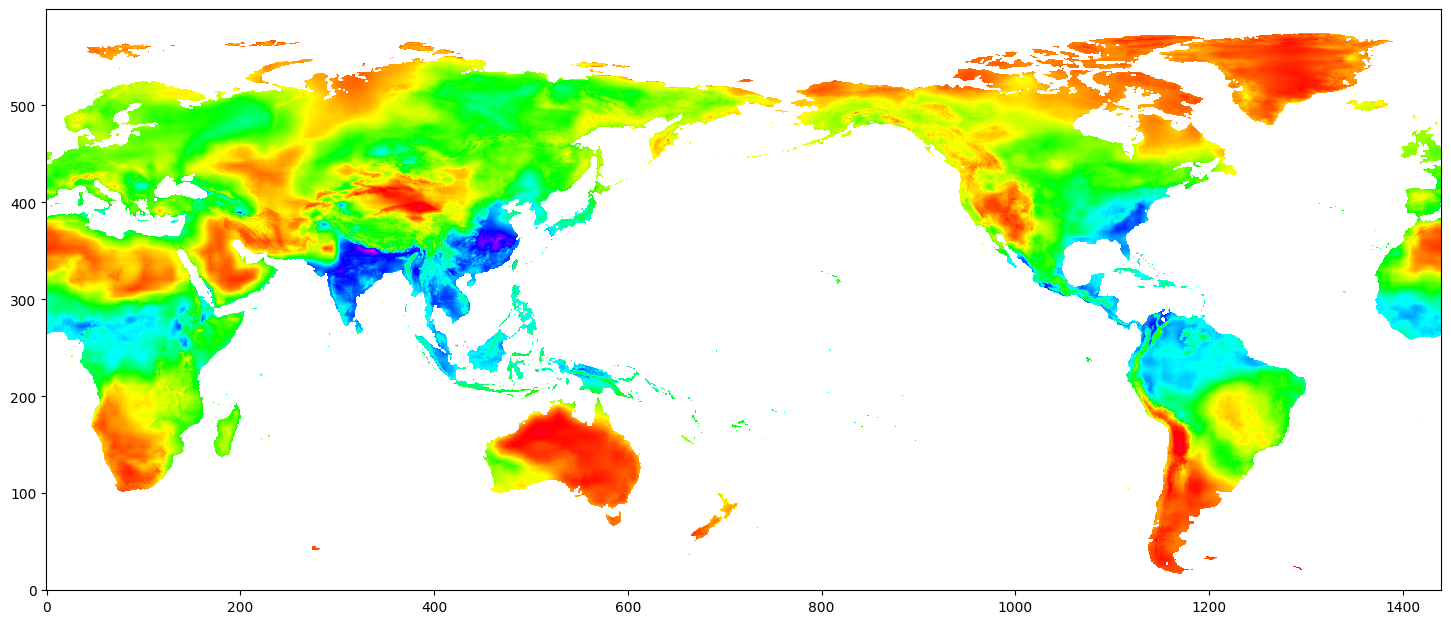

In [4]:
#| label: fig-cmip6
#| fig-cap: Simple plot of the NEX-GDDP-CMIP6 data as a numpy array. 
#|         Note how the axes of the plot are labeled with the indices of the array and not 
#|         with longitude and latitude corrdinates of the data.

import matplotlib.pyplot as plt
my_cmap = 'gist_rainbow'
plt.subplots(figsize=(18,9))
plt.imshow(data, cmap=my_cmap,origin='lower') # matplotlib puts the origin on the top left instead of bottom left
plt.savefig( "NEX-GDDP-CMIP6_ACCESS-CM2_tas_ssp585_2020_day202.png")
plt.show()